# Example: Water / Ice

In this example we use NCrystal to see the wavelength dependence of the total cross section of light water and ice at different temperatures. This could be applied for de determination of ice in neutron imaging experiments, as it is presented in [1]

[1] M. Siegwart, R. Woracek, J.I. Marquez Damian, A.S. Tremsin, V. Manzi-Orezzoli, M. Strobl, T.J. Schmidt, and P. Boillat. "Distinction between super-cooled water and ice with high duty cycle time-of-flight neutron imaging." Review of Scientific Instruments 90, no. 10 (2019).

https://doi.org/10.1063/1.5110288

In this example we will show how to add additional ncmat files from the [ncrystal-extra](https://github.com/mctools/ncrystal-extra) repository in Github, and how to create a new material using available information.

## Preamble
Install dependencies and prepare plots. Feel free to edit as you wish:

In [1]:
#By default we only do pip installs on Google Colab, but you
#can set the variable in the next line to True if you need it:
always_do_pip_installs = False
try:
    import google.colab as google_colab
except ModuleNotFoundError:
    google_colab=None#not on google colab
if always_do_pip_installs or google_colab:
    %pip -q install ncrystal[all] ipympl pandas
#enable inline and interactive matplotlib plots:
if google_colab:
    google_colab.output.enable_custom_widget_manager()
    import gemmi#avoid warning later
    import spglib#avoid warning later
    %matplotlib inline
else:
    %matplotlib ipympl
import matplotlib
matplotlib.rcParams.update({"figure.autolayout": True})

## Installing data files for water

We will start checking which data is available in the standard library for light water.

When it comes to liquids, NCrystal is currently limited to use scattering kernels computed with other tools (i.e. the scattering kernel for liquids is not yet computed on the fly from the vibrational density of states). These precomputed kernels are rather large, and for that reason only the room-temperature files are available in the standard data library, and installed with NCrystal itself. However, as we will see in the following, more temperatures are available by simply installing a plugin.

One important thing to note though is that NCrystal only looks for plugins when it is first loaded, meaning when you do the first `import NCrystal`. So for simplicity we will use the commandline tool `nctool` to get information about plugins and datafiles before we are ready to actually `import NCrystal`. So let us see what files are available:

In [2]:
# If you only cared about Unix, we could have instead simply written:
#  !nctool --browse | grep -i water
tmp = !nctool --browse
for line in tmp:
    if 'water' in line.lower() and not 'plugins' in line:
        print(line)

    LiquidHeavyWaterD2O_T293.6K.ncmat
    LiquidWaterH2O_T293.6K.ncmat


So only two files are available out of the box! But looking at https://github.com/mctools/ncrystal/wiki/CuratedPlugins we can tell that water data at additional temperatures are available in the ncrystal-plugin-WaterData plugin, so we install that:

In [3]:
%pip install ncrystal-plugin-WaterData

  Using cached ncrystal_plugin_WaterData-0.0.4-py3-none-any.whl.metadata (14 kB)
  Using cached ncrystal_pypluginmgr-0.0.5-py3-none-any.whl.metadata (14 kB)
Using cached ncrystal_plugin_WaterData-0.0.4-py3-none-any.whl (13.1 MB)
Using cached ncrystal_pypluginmgr-0.0.5-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


Checking again we see a lot more Water files:

In [4]:
# If you only cared about Unix, we could have instead simply written:
#  !nctool --browse | grep -i water
tmp = !nctool --browse
for line in tmp:
    if 'water' in line.lower():
        print(line)

    LiquidHeavyWaterD2O_T293.6K.ncmat
    LiquidWaterH2O_T293.6K.ncmat
==> 32 files from "plugins" (/some/where/ncrystal-notebooks/venv/lib/python3.12/site-packages/ncrystal_plugin_WaterData/data, priority=OnlyOnExplicitRequest):
    plugins::WaterData/LiquidHeavyWaterD2O_T283.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T293.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T300.0K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T323.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T350.0K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T373.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T400.0K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T423.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T450.0K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T473.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T500.0K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T523.6K.ncmat
    plugins::WaterData/LiquidHeavyWaterD2O_T550.0K.ncmat
    plugins::WaterData/Liquid

## Import NCrystal

Since we do not need to install more plugins, we can finally import NCrystal (and also verify it a bit):

In [5]:
#always import NCrystal:
import NCrystal as NC
assert NC.version_num >=  4000000, "too old NCrystal found"
NC.test() #< quick unit test that installation works

Tests completed succesfully


We can now use the Python API to see which light water data files are available:

In [6]:
for fn in NC.browseFiles():
  if 'LiquidWater' in fn.name:
    print(fn.fullKey)

stdlib::LiquidWaterH2O_T293.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T283.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T293.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T300.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T323.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T350.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T373.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T400.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T423.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T450.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T473.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T500.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T523.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T550.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T573.6K.ncmat
plugins::WaterData/LiquidWaterH2O_T600.0K.ncmat
plugins::WaterData/LiquidWaterH2O_T623.6K.ncmat


The `stdlib::` entry above is the same as the `T293.6K` data file from the WaterData plugin.

We will need a few other imports as well in the rest of the notebook:

In [7]:
import NCrystal.cifutils as nccif
import NCrystal.plot as ncplot
import numpy as np
import matplotlib.pyplot as plt
import pprint
import os

## Looking at the light water

First prepare the a list of water data files we wish to investigate:

In [8]:
all_water = sorted( x.fullKey for x in NC.browseFiles()
                    if x.fullKey.startswith('plugins::WaterData/LiquidWater') )
pprint.pprint(all_water)

['plugins::WaterData/LiquidWaterH2O_T283.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T293.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T300.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T323.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T350.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T373.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T400.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T423.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T450.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T473.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T500.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T523.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T550.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T573.6K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T600.0K.ncmat',
 'plugins::WaterData/LiquidWaterH2O_T623.6K.ncmat']


Let us plot the cross sections:

NCrystal WARNING: Discarding 52 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 52 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 50 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 47 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 43 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 40 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 36 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 32 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 29 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 28 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 26 edges of provided kernel data due to missing S values.
NCrystal WARNING: Discarding 25 edges of pr

Text(0, 0.5, 'Micro scattering cross section [b/atom]')

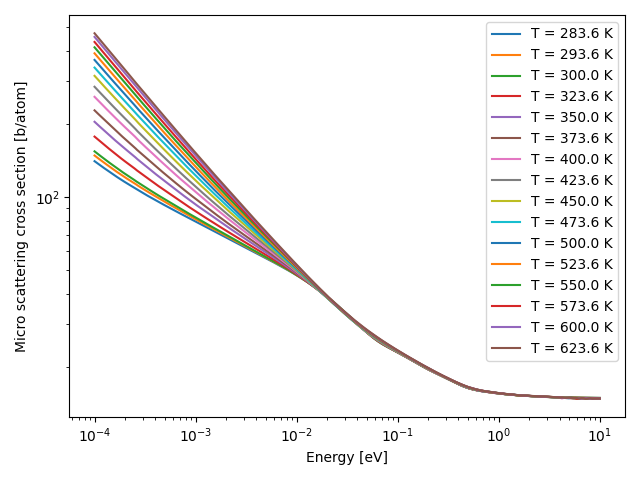

In [9]:
E = np.geomspace(1e-4, 10, 1000)

plt.figure()
for fn in all_water:
  mat = NC.load(fn)
  plt.loglog(E, mat.scatter.xsect(E), label=f'T = {mat.info.getTemperature()} K')
plt.legend()

plt.xlabel('Energy [eV]')
plt.ylabel('Micro scattering cross section [b/atom]')

Note that the `NCrystal WARNING: Discarding .. edges ...` warnings above are harmless, and are caused NCrystal noticing the invalid areas of the original ENDF kernels.

The current scattering kernels for light water come from the ENDF/B-VIII.0 nuclear data library [1] and were produced using the CAB Model for Water [2]. Models for $T < 373.15$ K are at 1 atm, and for $T > 373.15$ K are at saturation pressure.

[1] D.A. Brown, M.B. Chadwick, R. Capote, A.C. Kahler, et al. "ENDF/B-VIII. 0: the 8th major release of the nuclear reaction data library with CIELO-project cross sections, new standards and thermal scattering data". Nuclear Data Sheets, 148, pp.1-142 (2018).
https://doi.org/10.1016/j.nds.2018.02.001

[2] J.I. Marquez Damian,J. R. Granada, and D. C. Malaspina. "CAB models for water: A new evaluation of the thermal neutron scattering laws for light and heavy water in ENDF-6 format." Annals of Nuclear Energy 65, 280-289 (2014).

https://doi.org/10.1016/j.anucene.2013.11.014

## Create scattering kernel for ice Ih

We will now create a ncmat file for hexagonal ice (ice Ih) which is the phase that forms when water freezes at atmospheric pressure. Additional information on hexagonal ice and the phases of water can be found [here](https://water.lsbu.ac.uk/water/hexagonal_ice.html).

We will use the structure from the Crystallography Open Database [1], entry [1011023](https://www.crystallography.net/cod/1011023.html) [2], and the vibrational density of states used in the ENDF/B-VIII.0 scattering kernel, computed by Holmes and Zerkle [3].

[1] A. Vaitkus, A. Merkys, T. Sander, M. Quirós,P.A. Thiessen, E.E Bolton, and S. Gražulis, A workflow for deriving chemical entities from crystallographic data and its application to the Crystallography Open Database.
Journal of Cheminformatics, 15(1), (2023).

https://doi.org/10.1186/s13321-023-00780-2.

[2] J. D. Bernal, and R.H. Fowler. "A theory of water and ionic solution, with particular reference to hydrogen and hydroxyl ions." J. Chem. Phys 1, no. 8, 515-548 (1933).

http://dx.doi.org/10.1063/1.1749327

[3] J.C. Holmes, and M.L. Zerkle. "Production of the thermal scattering law and neutron scattering cross sec-tions for ice from first principles." International Conference on Nuclear Criticality Safety (ICNC 2015), Charlotte, NC, USA.

We start by retrieving the structure from the COD:

In [10]:
os.environ['NCRYSTAL_ONLINEDB_CACHEDIR'] = './ncrystal_onlinedb_filecache'
cifsrc = nccif.CIFSource('codid::1011023')
print( cifsrc.load_data() )

Querying the Crystallography Open Database for entry 1011023
Adding cod_1011023.cif to local file cache in $NCRYSTAL_ONLINEDB_CACHEDIR
#------------------------------------------------------------------------------
#$Date: 2017-10-16 01:16:12 +0300 (Mon, 16 Oct 2017) $
#$Revision: 202026 $
#$URL: file:///home/coder/svn-repositories/cod/cif/1/01/10/1011023.cif $
#------------------------------------------------------------------------------
#
# This file is available in the Crystallography Open Database (COD),
# http://www.crystallography.net/
#
# All data on this site have been placed in the public domain by the
# contributors.
#
data_1011023
loop_
_publ_author_name
'Bernal, J D'
'Fowler, R H'
_publ_section_title
;
A Theory of Water and Ionic Solution, with Particular Reference to
Hydrogen and Hydroxyl Ions
;
_journal_coden_ASTM              JCPSA6
_journal_name_full               'Journal of Chemical Physics'
_journal_page_first              515
_journal_page_last               548
_j

Note: this CIF file corresponds to Ice Ih(a), with space group 185. Other forms of hexagonal ice exist [1], and this might be taken into account depending on the application.

[1] D. Jovanović, D. Zagorac, J.C Schön, B. Milovanović, and J. Zagorac. A new theoretical model for hexagonal ice, Ih (d), from first principles investigations. Zeitschrift für Naturforschung B, 75(1-2), pp.125-128 (2020).

https://doi.org/10.1515/znb-2019-0164

Now we make a NCMATComposer object with this structure:

In [11]:
c_ice = NC.NCMATComposer.from_cif(cifsrc)

Using cached Crystallography Open Database result for entry 1011023
Attempting to load CIF data with gemmi
Self-consistency of structure was verified by spglib


In [12]:
print(c_ice())

NCMAT v7
# Autogenerated by NCMATComposer
#
# H2O (hexagonal, SG-185)
#
# Atoms per unit cell: 24xH+12xO
#
# Structure converted (with NCrystal.cifutils module) from:
#
#   "A Theory of Water and Ionic Solution, with Particular Reference to
#   Hydrogen and Hydroxyl Ions"
#   Bernal, J D and Fowler, R H [Journal of Chemical Physics, 1933]
#   DOI: https://dx.doi.org/10.1063/1.1749327
#   Crystallography Open Database entry 1011023
#   https://www.crystallography.net/cod/1011023.html
#
# IMPORTANT NOTICE: This is a mostly automatic conversion which has not been
#                   verified!  In particular the @DYNINFO sections might need
#                   post-editing. Before distributing this file to other people,
#                   please review this, amend the comments here to document,
#                   anything done, and remove this notice.
#
# WARNING: Fallback (dummy) Debye temperature values were used for 2 atoms!
#
# NOTICE: crystal structure was verified with spglib to be

The file contains the structural information, and the atom positions are verified to satisfy the symmetries of space group 185. The dynamics is represented with a simple Debye model as a place holder. We will replace this with the VDOS from Holmes and Zerkle.

We include here the vibrational density of states for H and O in light water ice. Curves were extracted from the ENDF-6 files using the one-phonon approximation to $S(0, \beta)$.

In [13]:
txt = """0.000000000000000000e+00 0.000000000000000000e+00
5.060000000000000478e-04 2.883849022022742514e-01
1.012000000000000096e-03 1.153400150352600795e+00
1.517999999999999818e-03 2.367283816279119435e+00
2.024000000000000191e-03 3.497420702987856345e+00
2.530000000000000131e-03 4.471637932618838462e+00
3.035999999999999636e-03 5.955900760772344427e+00
3.542000000000000443e-03 7.477049638617704552e+00
4.048000000000000383e-03 9.044700529519186460e+00
4.553999999999999888e-03 1.061793535225325869e+01
5.060000000000000261e-03 1.229680504070817904e+01
6.324999999999999893e-03 1.930291141220044082e+01
7.589999999999998657e-03 3.296922597614996420e+01
8.855000000000000024e-03 4.693781596267880474e+01
1.012000000000000052e-02 4.540233355781982993e+01
1.138500000000000102e-02 3.508185808897206925e+01
1.264999999999999979e-02 2.874293722773296977e+01
1.517999999999999731e-02 1.883445349789817413e+01
1.771000000000000005e-02 1.615279548671844267e+01
2.024000000000000105e-02 2.042328727463937810e+01
2.277000000000000204e-02 1.762401730263019672e+01
2.529999999999999957e-02 2.132437305413203177e+01
2.783000000000000057e-02 4.891415518248106764e+01
3.035999999999999463e-02 2.718480284985898265e+01
3.289000000000000257e-02 1.769293571959826039e+01
3.542000000000000010e-02 2.883600077206273582e+01
3.794999999999999762e-02 2.665634143397740985e+01
4.048000000000000209e-02 1.376993503599563740e+00
4.300999999999999962e-02 6.397501554953829734e-04
4.554000000000000409e-02 5.470202598765482906e-04
4.806999999999998774e-02 3.804773183981115291e-04
5.059999999999999915e-02 2.383857092015670767e-04
5.313000000000000361e-02 1.758517990417824545e-04
5.566000000000000114e-02 1.717089685747877467e-04
5.818999999999999173e-02 1.415270112322381912e-04
6.071999999999998926e-02 1.095964336926452448e-04
6.325000000000000067e-02 1.111204047217788702e-04
6.578000000000000513e-02 9.953940985723399107e-05
6.831000000000000960e-02 5.679128970111942251e-05
7.084000000000000019e-02 3.787195300709431160e-05
7.336999999999999078e-02 3.074183800276910819e-05
7.589999999999999525e-02 1.290483726912145613e-05
7.842999999999999972e-02 2.404256671109077572e-06
8.096000000000000418e-02 3.180656520044201280e-06
8.348999999999999477e-02 4.996211049163529315e-06
8.601999999999999924e-02 1.424312142998701847e-01
8.855000000000000371e-02 1.179069212950002721e-01
9.108000000000000818e-02 1.733523983422859738e+00
9.360999999999999877e-02 2.000652545589134690e-01
9.613999999999997548e-02 1.123567310110189764e-05
9.866999999999999382e-02 1.383531729769606952e-05
1.011999999999999983e-01 1.389788123119954122e-05
1.037299999999999889e-01 1.125030273486978982e-05
1.062600000000000072e-01 5.827428038377292507e-01
1.087899999999999978e-01 6.697617556814178252e-01
1.113200000000000023e-01 1.207992012950673683e-01
1.138499999999999929e-01 1.237232256243846695e+00
1.163799999999999835e-01 9.100830054566003691e-01
1.189100000000000018e-01 6.951482944174336431e-02
1.214399999999999785e-01 3.810279341099103156e-01
1.239700000000000246e-01 6.953796143304357136e-01
1.265000000000000013e-01 1.565614818337411895e-01
1.290299999999999780e-01 1.391316679304783044e-05
1.315600000000000103e-01 1.312911158370812504e-05
1.340899999999999870e-01 9.933414303646770165e-06
1.366200000000000192e-01 6.685480794892814425e-06
1.391499999999999959e-01 4.313001724371301917e-06
1.416800000000000004e-01 4.662612978667513958e-06
1.442100000000000048e-01 4.582151293411740351e-06
1.467399999999999816e-01 3.094481066643653039e-06
1.492700000000000138e-01 3.039583050433871674e-06
1.517999999999999905e-01 3.422207609763860240e-06
1.543299999999999950e-01 2.002487403497484508e-06
1.568599999999999994e-01 1.115120859565699518e-06
1.593900000000000039e-01 1.287260468348693081e-06
1.619200000000000084e-01 6.804864159194056056e-07
1.644499999999999851e-01 1.549399313010874672e-07
1.669799999999999895e-01 9.951980742859653566e-08
1.695100000000000218e-01 1.763364717068570011e-07
1.720399999999999985e-01 2.526926674059059784e-07
1.745700000000000029e-01 2.653545779986962713e-07
1.771000000000000074e-01 3.956920825445296357e-07
1.796299999999999564e-01 4.969901880629441291e-07
1.821600000000000164e-01 6.624545397111023244e-07
1.846899999999999931e-01 1.412213648589005498e-06
1.872199999999999975e-01 3.252382039901963612e-06
1.897500000000000020e-01 8.556777362162727531e-06
1.922799999999999510e-01 1.091304948751262604e-05
1.948099999999999832e-01 1.655658133658928513e-05
1.973399999999999876e-01 2.624594461258680789e-01
1.998699999999999921e-01 2.351734405131690409e+00
2.023999999999999966e-01 7.697396484118211868e-01
2.049300000000000010e-01 2.133010954766428213e+00
2.074599999999999778e-01 3.695847225478283358e-05
2.099900000000000100e-01 2.796484790179166105e-05
2.125200000000000145e-01 2.425890094341358298e-05
2.150499999999999912e-01 1.506203551302586365e-05
2.175799999999999956e-01 8.740964774247490481e-06
2.201099999999999723e-01 5.775682307953858107e-06
2.226400000000000046e-01 4.767281826926283901e-06
2.251700000000000090e-01 5.636106198252105759e-06
2.276999999999999857e-01 6.080048371389239213e-06
2.302299999999999625e-01 5.290341561723014911e-06
2.327599999999999669e-01 5.373793264880461348e-06
2.352900000000000547e-01 4.727092809017465486e-06
2.378200000000000036e-01 2.869153705688560368e-06
2.403500000000000081e-01 2.222585826228122224e-06
2.428799999999999570e-01 9.836559402607070511e-07
2.454099999999999893e-01 6.351314929736053016e-08
2.479400000000000492e-01 5.817970807342710417e-09
2.504700000000000260e-01 1.145821653755291608e-09
2.530000000000000027e-01 9.998909681526179643e-11
2.555299999999999794e-01 1.982055748070002594e-11
2.580599999999999561e-01 1.566090466064390920e-11
2.605899999999999883e-01 1.359487576735446604e-11
2.631200000000000205e-01 1.174460909179000246e-11
2.656499999999999972e-01 9.230286460490579797e-12
2.681799999999999740e-01 7.270853415506054937e-12
2.707099999999999507e-01 5.222110795326685112e-12
2.732400000000000384e-01 3.459490643070369751e-12
2.757700000000000151e-01 2.096592858737407922e-12
2.782999999999999918e-01 1.368964749832412694e-12
2.808299999999999685e-01 1.120726683667904986e-12
2.833600000000000008e-01 2.256478210009728612e-12
2.858900000000000330e-01 1.001609254391501693e-08
2.884200000000000097e-01 2.302567377625905195e-08
2.909499999999999864e-01 5.669422588874445631e-08
2.934799999999999631e-01 2.539697681063101615e-08
2.960099999999999953e-01 3.790043181599647916e-08
2.985400000000000276e-01 4.131082388545300182e-09
3.010700000000000043e-01 4.026325756573600128e-12
3.035999999999999810e-01 1.093686423637686752e-09
3.061300000000000132e-01 2.606604510321965438e-08
3.086599999999999899e-01 2.152000692900502930e-08
3.111900000000000222e-01 3.250838626588698357e-08
3.137199999999999989e-01 5.367726215733498919e-08
3.162499999999999756e-01 3.292264226534639968e-08
3.187800000000000078e-01 3.286768268953506345e-08
3.213099999999999845e-01 6.034439966070248636e-08
3.238400000000000167e-01 2.144978272595770059e-08
3.263699999999999934e-01 3.215698369888215916e-08
3.288999999999999702e-01 1.507262651610132251e-08
3.314300000000000024e-01 2.142297891437490852e-09
3.339599999999999791e-01 5.838559293673130758e-10
3.364900000000000113e-01 1.390331099357339761e-08
3.390200000000000435e-01 3.208543626500598941e-08
3.415500000000000758e-01 3.625845482551586057e-08
3.440799999999999970e-01 7.361237443950054561e-08
3.466099999999999737e-01 1.541047912532941108e-07
3.491400000000000059e-01 1.667941466447290322e-07
3.516699999999999826e-01 2.397889037848473844e-07
3.542000000000000148e-01 3.829507392768694000e-07
3.567299999999999915e-01 5.072164847727268389e-07
3.592599999999999127e-01 8.245945798144106789e-07
3.617899999999999450e-01 1.670412844900979344e-06
3.643200000000000327e-01 3.691370313476315131e-06
3.668500000000000649e-01 6.506252144166972970e-06
3.693799999999999861e-01 7.809700106698804848e-06
3.719099999999999628e-01 1.260873589665825372e-05
3.744399999999999951e-01 2.218314520758850161e+00
3.769700000000000273e-01 8.658621940991413357e-01
3.795000000000000040e-01 5.060104812958891030e-01
3.820299999999999807e-01 1.011586222384029732e+00
3.845599999999999019e-01 4.402282385142110011e-01
3.870899999999999341e-01 7.923930408835356820e-01
3.896199999999999664e-01 2.922899837113844601e+00
3.921499999999999986e-01 1.754793512247840193e+00
3.946799999999999753e-01 2.504592551543724177e+00
3.972099999999999520e-01 6.025089222374397751e-05
3.997399999999999842e-01 4.857034247989964158e-05
"""
# From ENDF-6 file

holmes_O = np.fromstring(txt, sep=' ')
holmes_O.shape = (-1, 2)

In [14]:
txt = """0.000000000000000000e+00 0.000000000000000000e+00
5.060000000000000478e-04 9.481969976656070068e-03
1.012000000000000096e-03 3.792329830552217812e-02
1.517999999999999818e-03 7.961955151797726893e-02
2.024000000000000191e-03 1.237345864328847633e-01
2.530000000000000131e-03 1.679503118679502582e-01
3.035999999999999636e-03 2.225506107383489196e-01
3.542000000000000443e-03 2.777824267920364631e-01
4.048000000000000383e-03 3.442900550430591511e-01
4.553999999999999888e-03 4.220368509412710245e-01
5.060000000000000261e-03 5.084022688234719478e-01
6.324999999999999893e-03 7.845498523048110018e-01
7.589999999999998657e-03 1.019992111524830491e+00
8.855000000000000024e-03 2.680891553042469955e+00
1.012000000000000052e-02 3.224700950914748621e+00
1.138500000000000102e-02 3.145002202032655791e+00
1.264999999999999979e-02 3.018117368757014862e+00
1.517999999999999731e-02 8.326946901054069761e-01
1.771000000000000005e-02 2.584248488544749219e-06
2.024000000000000105e-02 1.330240078832432005e-01
2.277000000000000204e-02 3.023644538633007278e-02
2.529999999999999957e-02 5.078432659026605595e-02
2.783000000000000057e-02 2.075702789955073513e+00
3.035999999999999463e-02 2.163538827209200655e+00
3.289000000000000257e-02 1.684280621352337803e+00
3.542000000000000010e-02 1.695701587600832339e+00
3.794999999999999762e-02 1.534824082768804887e+00
4.048000000000000209e-02 2.647894102456824012e-06
4.300999999999999962e-02 2.106371582140060183e-06
4.554000000000000409e-02 1.673144000907608366e-06
4.806999999999998774e-02 1.186963346858009909e-06
5.059999999999999915e-02 6.423875299545301701e-07
5.313000000000000361e-02 2.230628182467319015e-07
5.566000000000000114e-02 4.162998284030596753e-07
5.818999999999999173e-02 1.327811189403610618e-06
6.071999999999998926e-02 2.549053670410639611e-06
6.325000000000000067e-02 3.436338809503022472e-06
6.578000000000000513e-02 7.749574520149781279e-03
6.831000000000000960e-02 2.437577158326608817e+00
7.084000000000000019e-02 1.376023786347420597e+01
7.336999999999999078e-02 1.545567829638565804e+01
7.589999999999999525e-02 1.100675052938928644e+01
7.842999999999999972e-02 8.336120968995230029e+00
8.096000000000000418e-02 1.826149941477366667e+01
8.348999999999999477e-02 1.754927962575797196e+01
8.601999999999999924e-02 1.753305323153719542e+01
8.855000000000000371e-02 6.395695189705371320e+00
9.108000000000000818e-02 3.873317821720363430e+00
9.360999999999999877e-02 2.841759487909877313e-01
9.613999999999997548e-02 1.626954004739922244e+00
9.866999999999999382e-02 6.797624790611360268e+00
1.011999999999999983e-01 8.673146341301155360e+00
1.037299999999999889e-01 8.182317817153007766e+00
1.062600000000000072e-01 7.805199920065450492e+00
1.087899999999999978e-01 1.075854913708755589e+01
1.113200000000000023e-01 8.681314306125829106e+00
1.138499999999999929e-01 4.982520001025021017e+00
1.163799999999999835e-01 1.459102490093386351e+01
1.189100000000000018e-01 8.040661096025974786e+00
1.214399999999999785e-01 5.112995198932107632e-01
1.239700000000000246e-01 9.288092517353964820e-06
1.265000000000000013e-01 8.738817650899756038e-06
1.290299999999999780e-01 7.349785857678417663e-06
1.315600000000000103e-01 4.182485846081669102e-06
1.340899999999999870e-01 2.294199940231162687e-06
1.366200000000000192e-01 2.295086539180408950e-06
1.391499999999999959e-01 2.857842899486232335e-06
1.416800000000000004e-01 4.036267787858071418e-06
1.442100000000000048e-01 5.928729136392631436e-06
1.467399999999999816e-01 6.798749268747522048e-06
1.492700000000000138e-01 6.956815298038475040e-06
1.517999999999999905e-01 8.375425527195941858e-06
1.543299999999999950e-01 1.085783155685455984e-05
1.568599999999999994e-01 1.169737211113859764e-05
1.593900000000000039e-01 1.090869361167568672e-05
1.619200000000000084e-01 9.582643653152600835e-06
1.644499999999999851e-01 8.990424480339014989e-06
1.669799999999999895e-01 8.741213104327005907e-06
1.695100000000000218e-01 8.776337842565829858e-06
1.720399999999999985e-01 8.470468893375351818e-06
1.745700000000000029e-01 7.551942419920310924e-06
1.771000000000000074e-01 7.499851618032043693e-06
1.796299999999999564e-01 8.556520890588030089e-06
1.821600000000000164e-01 1.034072097359442200e-05
1.846899999999999931e-01 1.190495720722029107e-05
1.872199999999999975e-01 1.434571737388416174e-05
1.897500000000000020e-01 1.641593849240026976e-05
1.922799999999999510e-01 1.535175825671932781e-05
1.948099999999999832e-01 1.463699825323508226e-05
1.973399999999999876e-01 1.734726992700556636e+00
1.998699999999999921e-01 1.433219661734396233e+01
2.023999999999999966e-01 6.834766691639901914e+00
2.049300000000000010e-01 1.523161550552477550e+01
2.074599999999999778e-01 1.831038393320852053e+00
2.099900000000000100e-01 1.455755152556440303e-05
2.125200000000000145e-01 1.370640772847309061e-05
2.150499999999999912e-01 1.147628075642785476e-05
2.175799999999999956e-01 8.159042168958719970e-06
2.201099999999999723e-01 4.762758855186392871e-06
2.226400000000000046e-01 3.077106815645686430e-06
2.251700000000000090e-01 3.182517652314402641e-06
2.276999999999999857e-01 4.228114661582391843e-06
2.302299999999999625e-01 3.250038340970875058e-06
2.327599999999999669e-01 3.687229404768699736e-06
2.352900000000000547e-01 3.569953367246022889e-06
2.378200000000000036e-01 1.604530805993977590e-06
2.403500000000000081e-01 1.082768821408706220e-06
2.428799999999999570e-01 4.787592482833531197e-07
2.454099999999999893e-01 3.713342544682700450e-08
2.479400000000000492e-01 6.711614234674819888e-12
2.504700000000000260e-01 6.060495497547524698e-12
2.530000000000000027e-01 6.272336426206002136e-12
2.555299999999999794e-01 1.084903557225263254e-11
2.580599999999999561e-01 1.937623654960596382e-11
2.605899999999999883e-01 1.933335514705731704e-11
2.631200000000000205e-01 2.861936750187464373e-11
2.656499999999999972e-01 1.202573016003417973e-07
2.681799999999999740e-01 1.818465398435689700e-06
2.707099999999999507e-01 4.111359548551633110e-06
2.732400000000000384e-01 5.990409659070968502e-06
2.757700000000000151e-01 6.506896092849084591e-06
2.782999999999999918e-01 7.554974470464750476e-06
2.808299999999999685e-01 7.160220923871623427e-06
2.833600000000000008e-01 8.620224767091356547e-06
2.858900000000000330e-01 7.893694282548228231e-06
2.884200000000000097e-01 6.513675463430699767e-06
2.909499999999999864e-01 4.297025304201457466e-06
2.934799999999999631e-01 1.729050399967154560e-06
2.960099999999999953e-01 1.508838829737454615e-06
2.985400000000000276e-01 1.913827045117637160e-06
3.010700000000000043e-01 2.790915234027050661e-06
3.035999999999999810e-01 3.432332856671020680e-06
3.061300000000000132e-01 4.082693646682878733e-06
3.086599999999999899e-01 3.928035236805780580e-06
3.111900000000000222e-01 3.731060872505539431e-06
3.137199999999999989e-01 3.752786493918641020e-06
3.162499999999999756e-01 4.153478962605815586e-06
3.187800000000000078e-01 2.944349593166625916e-06
3.213099999999999845e-01 2.516762578800805462e-06
3.238400000000000167e-01 1.302640822803214332e-06
3.263699999999999934e-01 1.921996711061703504e-07
3.288999999999999702e-01 5.479377869614919691e-10
3.314300000000000024e-01 3.034533452124653357e-12
3.339599999999999791e-01 2.267331400897250357e-10
3.364900000000000113e-01 1.226053914492373576e-08
3.390200000000000435e-01 2.745810733710784462e-08
3.415500000000000758e-01 3.577212100979928429e-08
3.440799999999999970e-01 7.992713873942166892e-08
3.466099999999999737e-01 1.246021082050334182e-07
3.491400000000000059e-01 7.516685817139240700e-08
3.516699999999999826e-01 9.826494641470411766e-08
3.542000000000000148e-01 1.094957998727919359e-07
3.567299999999999915e-01 1.097907810879000962e-07
3.592599999999999127e-01 4.376212467403024985e-07
3.617899999999999450e-01 1.704527977000741893e-06
3.643200000000000327e-01 3.624286750815060180e-06
3.668500000000000649e-01 4.375186549511060154e-06
3.693799999999999861e-01 5.204540767692891657e-06
3.719099999999999628e-01 7.641643348358056857e-06
3.744399999999999951e-01 3.110286960572949155e+01
3.769700000000000273e-01 1.293772850287891885e+01
3.795000000000000040e-01 1.135918602299986802e+01
3.820299999999999807e-01 1.342973612070236555e+01
3.845599999999999019e-01 8.531778058395193653e+00
3.870899999999999341e-01 8.150043340931645730e+00
3.896199999999999664e-01 1.924229717856492172e+01
3.921499999999999986e-01 1.240923108182910362e+01
3.946799999999999753e-01 2.417049352844847476e+01
3.972099999999999520e-01 2.179279473764565153e-05
3.997399999999999842e-01 2.004821959992991026e-05
"""

# From ENDF-6 file

holmes_H = np.fromstring(txt, sep=' ')
holmes_H.shape = (-1, 2)

Text(0.5, 0, 'Energy [eV]')

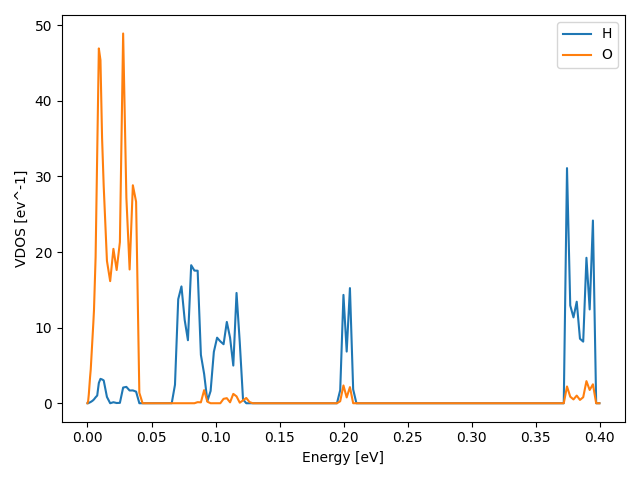

In [15]:
plt.figure()
plt.plot(holmes_H[:,0], holmes_H[:,1], label='H')
plt.plot(holmes_O[:,0], holmes_O[:,1], label='O')
plt.legend()
plt.ylabel('VDOS [ev^-1]')
plt.xlabel('Energy [eV]')

We will use the NCrystal Phonon DOS Analyser to study the effect of the cutoff energy in the spectrum. Below this cutoff energy NCrystal will extrapolate the spectrum as a parabola.

In [16]:
dosana = NC.PhononDOSAnalyser([('H', holmes_H[:,0], holmes_H[:,1]), ('O', holmes_O[:,0], holmes_O[:,1])])

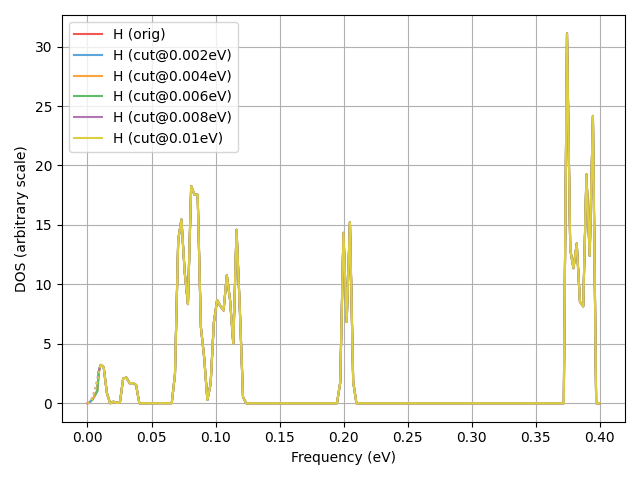

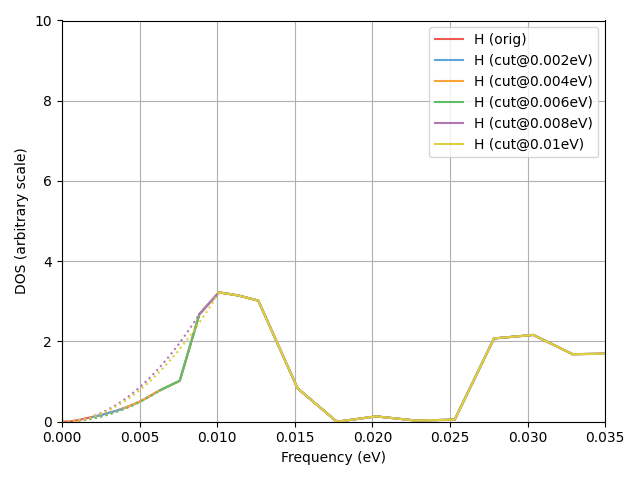

In [17]:
cutoff_candidates = np.linspace(0.002,0.01,5)
dosana.plot_cutoff_effects(cutoff_candidates,'H')
#Zoom of the same plot:
dosana.plot_cutoff_effects(cutoff_candidates,'H',xmin=0.00,xmax=0.035,ymin=0,ymax=10)

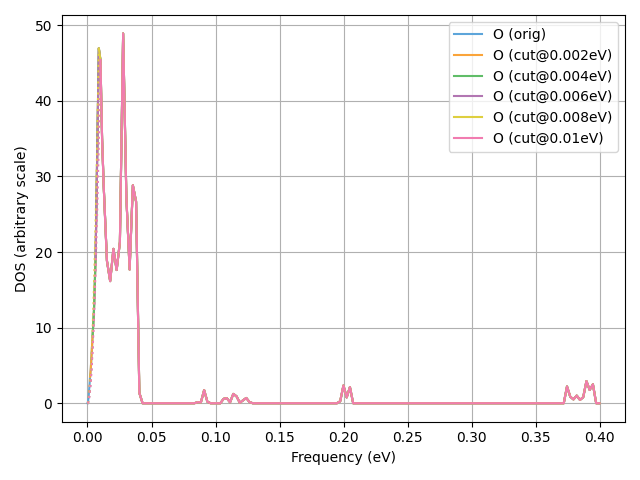

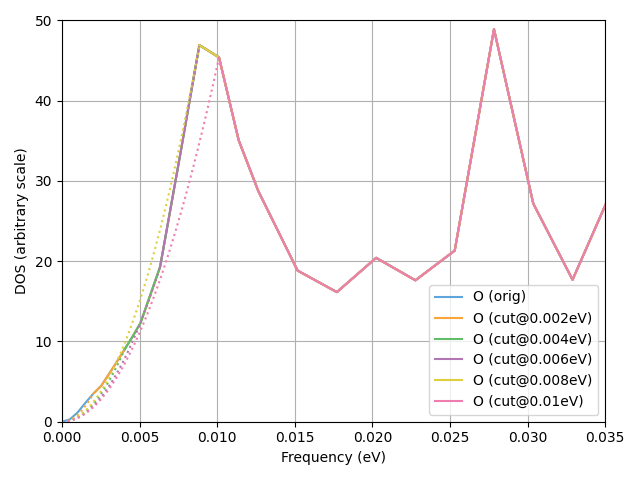

In [18]:
cutoff_candidates = np.linspace(0.002,0.01,5)
dosana.plot_cutoff_effects(cutoff_candidates,'O')
#Zoom of the same plot:
dosana.plot_cutoff_effects(cutoff_candidates,'O',xmin=0.00,xmax=0.035,ymin=0,ymax=50)

$E_{cutoff} = 4$ meV is a reasonable value for the cutoff in both spectra.

In [19]:
E_cutoff = 0.004
dosana_final = dosana.apply_cutoff(E_cutoff)

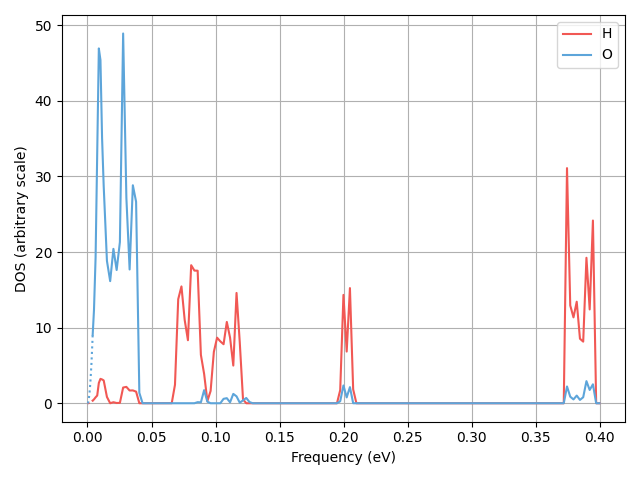

In [20]:
dosana_final.plot()

Now we apply these spectra to the NCMATComposer object to get the full model. We add a comment to document the source of the dynamical data.

In [21]:
dosana_final.apply_to( c_ice )
txt = """ ############################################

Vibrational density of states obtained from the ENDF/B-VIII.0 library
as computed by Holmes and Zerkle.

D.A. Brown, M.B. Chadwick, R. Capote, A.C. Kahler, et al.
"ENDF/B-VIII. 0: the 8th major release of the nuclear reaction data library
with CIELO-project cross sections, new standards and thermal scattering data".
Nuclear Data Sheets, 148, pp.1-142 (2018).
https://doi.org/10.1016/j.nds.2018.02.001

J.C. Holmes, and M.L. Zerkle. "Production of the thermal scattering law and
neutron scattering cross sec-tions for ice from first principles."
International Conference on Nuclear Criticality Safety (ICNC 2015),
Charlotte, NC, USA.

"""

c_ice.add_comments(txt)

print(c_ice())

NCMAT v7
# Autogenerated by NCMATComposer
#
# H2O (hexagonal, SG-185)
#
# Atoms per unit cell: 24xH+12xO
#
# Structure converted (with NCrystal.cifutils module) from:
#
#   "A Theory of Water and Ionic Solution, with Particular Reference to
#   Hydrogen and Hydroxyl Ions"
#   Bernal, J D and Fowler, R H [Journal of Chemical Physics, 1933]
#   DOI: https://dx.doi.org/10.1063/1.1749327
#   Crystallography Open Database entry 1011023
#   https://www.crystallography.net/cod/1011023.html
#
# IMPORTANT NOTICE: This is a mostly automatic conversion which has not been
#                   verified!  In particular the @DYNINFO sections might need
#                   post-editing. Before distributing this file to other people,
#                   please review this, amend the comments here to document,
#                   anything done, and remove this notice.
#
#  ############################################
#
# Vibrational density of states obtained from the ENDF/B-VIII.0 library
# as computed 

Now that we have a complete model for ice, we can plot the cross sections to see the different components:

In [ ]:
ncplot.plot_xsect(c_ice, mode='ekin', xmin=1e-5, xmax=5)

and generate a ncmat file to use in our simulations:

In [ ]:
a = c_ice.write('ice.ncmat')

We will now compare this file with experimental data from the EXFOR database, [entry 31588003](http://www-nds.iaea.org/EXFOR/31588.003), as measured by Torres [1]. Cross sections from NCrystal are multiplied by 3 to obtain the value per molecule.

[1] L. Torres, J. R. Granada, and J. J. Blostein. "Total cross sections of benzene at 90 K and light water ice at 115 K." Nuclear Instruments and Methods in Physics Research Section B: Beam Interactions with Materials and Atoms 251, no. 1, 304-305 (2006).

https://doi.org/10.1016/j.nimb.2006.05.027

In [ ]:
from urllib.request import urlopen, Request
import pandas as pd
import io
x4ids = [ 31588003 ]
x4label = ['Light water ice (115 K)']

fig, ax = plt.subplots()

#for x4id in x4ids:
for i, x4id in enumerate(x4ids):
    req = Request(
        url=f'https://nds.iaea.org/exfor/x4get?DatasetID={x4id}&op=csv',
        data=None,
        headers={
            'User-Agent': 'Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
        }
    )
    with urlopen(req) as f:
        df = pd.read_csv(io.StringIO(f.read().decode('utf-8')))
    if 'EN (EV) 1.1' in list(df):
        x4_E, x4_xs = df['EN (EV) 1.1'].values, df['DATA (B) 0.1'].values
    elif 'EN (MEV) 1.1' in list(df):
        x4_E, x4_xs = 1e6*df['EN (MEV) 1.1'].values, df['DATA (B) 0.1'].values

    # ax.plot(NC.ekin2wl(x4_E), x4_xs, '.', label=x4label[i]+ f', X4: {x4id}')
    ax.plot(x4_E, x4_xs, '.', label=x4label[i]+ f', X4: {x4id}')

mat = NC.load('ice.ncmat;temp=115K')
xs = 3*(mat.scatter.xsect(E)+mat.absorption.xsect(E))
plt.plot(E, xs, label = 'NCrystal model')

ax.legend(loc='upper right')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(40, 200)
ax.set_xlim(1e-3, 5)
ax.set_xlabel("Energy [eV] ")
ax.set_ylabel("Cross-section (b per molecule)")

## Comparison of water and ice

Now that we have the models, we can compare the wavelength dependence of the total cross section of light water

In [ ]:
wl = np.linspace(2,9,1000)

mat_water350 = NC.load('plugins::WaterData/LiquidWaterH2O_T350.0K.ncmat')
mat_water293 = NC.load('plugins::WaterData/LiquidWaterH2O_T293.6K.ncmat')
mat_water283 = NC.load('plugins::WaterData/LiquidWaterH2O_T283.6K.ncmat')
mat_ice271 = NC.load('ice.ncmat;temp=271K')
mat_ice100 = NC.load('ice.ncmat;temp=100K')

#There are 3 atoms per water molecule:
atoms_per_molecule = 3

plt.figure()
plt.plot(wl, atoms_per_molecule*mat_water350.xsect(wl=wl), 'r', label='Water (77 C)')
plt.plot(wl, atoms_per_molecule*mat_water293.xsect(wl=wl), 'g', label='Water (22 C)')
plt.plot(wl, atoms_per_molecule*mat_water283.xsect(wl=wl), 'b', label='Water (10 C)')
plt.plot(wl, atoms_per_molecule*mat_ice271.xsect(wl=wl), 'k', label='Ice (-2 C)')
plt.plot(wl, atoms_per_molecule*mat_ice100.xsect(wl=wl), 'k--', label='Ice (-173 C)')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Micro total cross section [b/molecule]')
plt.show()